In [6]:
from google.colab import files
files.upload()

Saving happiness_2017.csv to happiness_2017.csv


{'happiness_2017.csv': b'Country,Region,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government\r\nNorway,Western Europe,1,7.537,7.578744888,11.08178902,0.950127661,71.086586,0.953016818,0.210104033,0.249711379,0.849099994,0.202913806,0.717159748\r\nDenmark,Western Europe,2,7.522,7.593702316,10.74898911,0.952100098,71.66249847,0.955416322,0.145387098,0.181147561,0.823667407,0.205775306,0.572353303\r\nIceland,Western Europe,3,7.504,7.476213932,10.76040936,0.966752827,72.75598145,0.938783288,0.235478714,0.726845384,0.895254552,0.148160011,0.365041941\r\nSwitzerland,Western Europe,4,7.494,7.473593235,10.95554829,0.949661374,73.17375946,0.924996913,0.167874664,0.316183478,0.773997068,0.195871487,0.819706738\r\nFinland,Western Europe,5,7.469,7.788251877,10.61233807,0.963826418,71.69696045,0.962198973,-0.012173655,0.192

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [9]:
df = pd.read_csv("happiness_2017.csv")
df.head()

,Country,Region,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Norway,Western Europe,1.0,7.537,7.578745,11.081789,0.950128,71.086586,0.953017,0.210104,0.249711,0.849100,0.202914,0.717160
1,Denmark,Western Europe,2.0,7.522,7.593702,10.748989,0.952100,71.662498,0.955416,0.145387,0.181148,0.823667,0.205775,0.572353
2,Iceland,Western Europe,3.0,7.504,7.476214,10.760409,0.966753,72.755981,0.938783,0.235479,0.726845,0.895255,0.148160,0.365042
3,Switzerland,Western Europe,4.0,7.494,7.473593,10.955548,0.949661,73.173759,0.924997,0.167875,0.316183,0.773997,0.195871,0.819707
4,Finland,Western Europe,5.0,7.469,7.788252,10.612338,0.963826,71.696960,0.962199,-0.012174,0.192413,0.787137,0.176066,0.597539


In [10]:
df.shape


(145, 14)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            140 non-null    object 
 1   Region                             140 non-null    object 
 2   Rank                               140 non-null    float64
 3   HappinessScore                     142 non-null    float64
 4   Life Ladder                        140 non-null    float64
 5   Log GDP per capita                 133 non-null    float64
 6   Social support                     139 non-null    float64
 7   Healthy life expectancy at birth   140 non-null    float64
 8   Freedom to make life choices       139 non-null    float64
 9   Generosity                         132 non-null    float64
 10  Perceptions of corruption          128 non-null    float64
 11  Positive affect                    139 non-null    float64

In [13]:
df.describe()


,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,140.0000,142.000000,140.000000,133.000000,139.000000,140.000000,139.000000,132.000000,128.000000,139.000000,139.000000,127.000000
mean,70.5000,5.368702,5.491702,9.345615,0.806711,63.440981,0.777874,-0.011614,0.735870,0.699412,0.291164,0.493701
std,40.5586,1.159151,1.122178,1.184935,0.121117,7.595597,0.127969,0.161064,0.179799,0.107246,0.091985,0.198235
min,1.0000,1.109750,2.661718,6.625341,0.319589,44.386528,0.427011,-0.296735,0.161791,0.420962,0.114123,0.110937
25%,35.7500,4.537500,4.636694,8.545789,0.736748,58.005130,0.711635,-0.141405,0.681880,0.614203,0.219028,0.333884
50%,70.5000,5.302000,5.586507,9.547693,0.828953,65.209110,0.811671,-0.035203,0.782116,0.710230,0.280323,0.473544
75%,105.2500,6.152250,6.278276,10.313942,0.905827,69.062944,0.878373,0.098457,0.857171,0.788236,0.345125,0.617711
max,140.0000,7.537000,7.788252,11.465231,0.966753,76.536362,0.985178,0.628706,0.954393,0.895255,0.599335,0.964690


In [14]:
df_numeric = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)

df_numeric.columns, df_categorical.columns


(Index(['Rank', 'HappinessScore', 'Life Ladder', 'Log GDP per capita',
        'Social support', 'Healthy life expectancy at birth',
        'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption', 'Positive affect', 'Negative affect',
        'Confidence in national government'],
       dtype='object'),
 Index(['Country', 'Region'], dtype='object'))

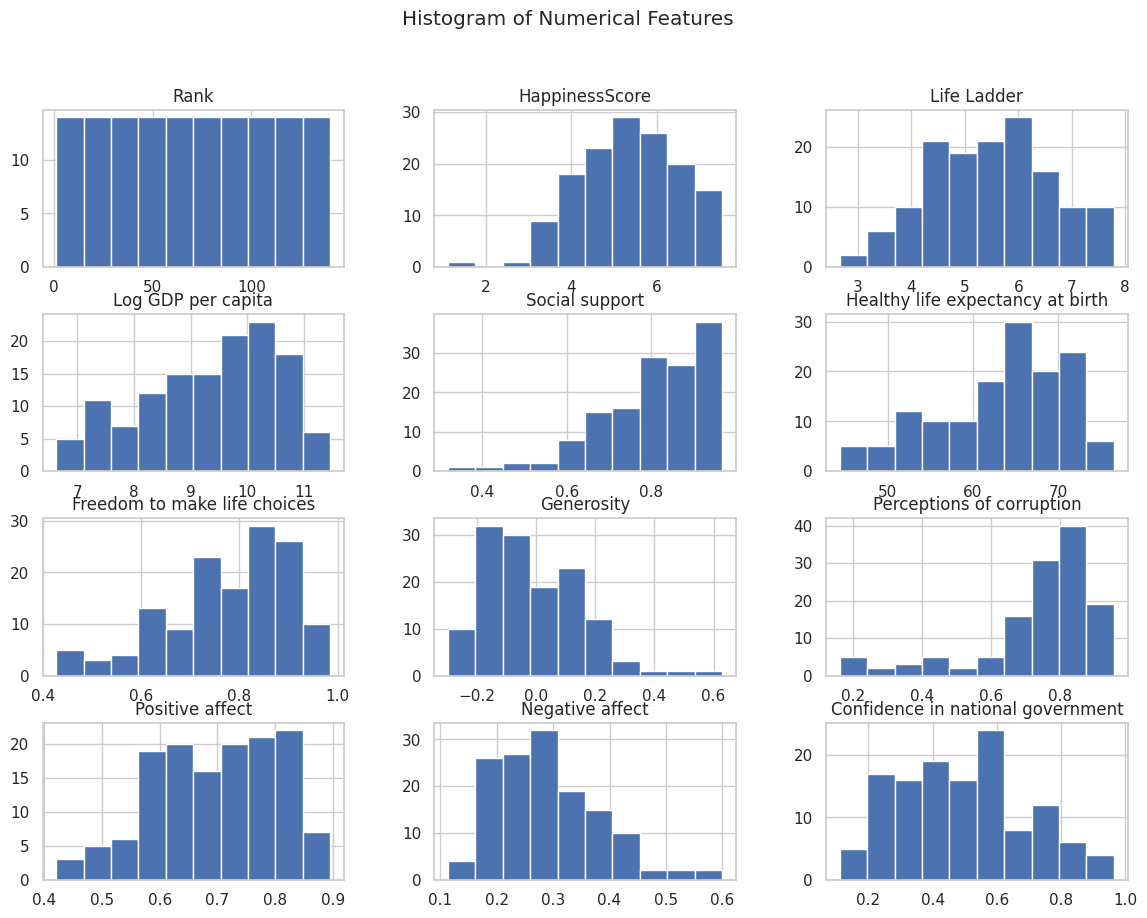

In [15]:
df_numeric.hist(figsize=(14,10))
plt.suptitle("Histogram of Numerical Features")
plt.show()


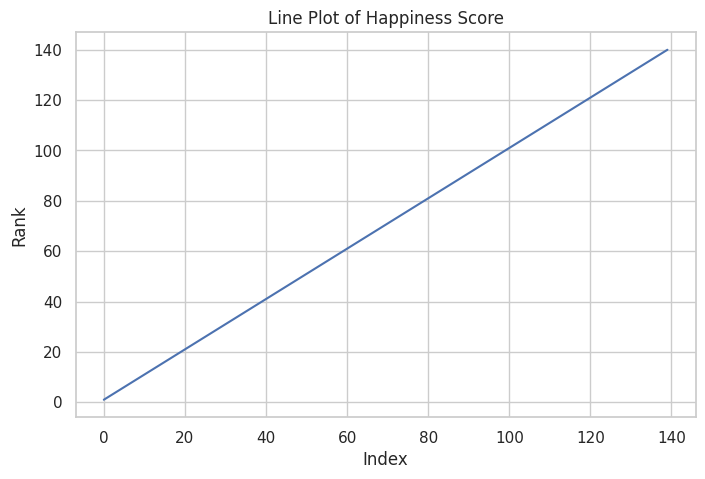

In [16]:
score_col = df_numeric.columns[0]

plt.figure(figsize=(8,5))
plt.plot(df[score_col])
plt.title("Line Plot of Happiness Score")
plt.xlabel("Index")
plt.ylabel(score_col)
plt.show()


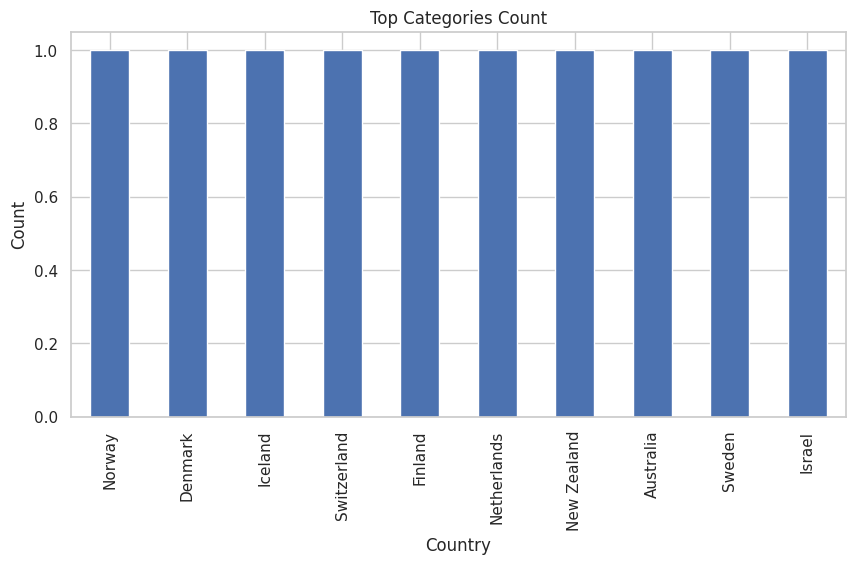

In [17]:
cat_col = df_categorical.columns[0]

plt.figure(figsize=(10,5))
df[cat_col].value_counts().head(10).plot(kind="bar")
plt.title("Top Categories Count")
plt.xlabel(cat_col)
plt.ylabel("Count")
plt.show()


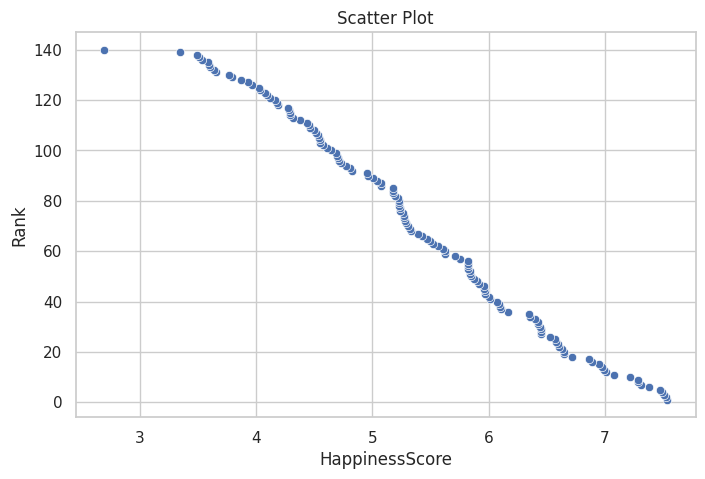

In [18]:
second_num_col = df_numeric.columns[1]

plt.figure(figsize=(8,5))
sns.scatterplot(x=df[second_num_col], y=df[score_col])
plt.title("Scatter Plot")
plt.xlabel(second_num_col)
plt.ylabel(score_col)
plt.show()


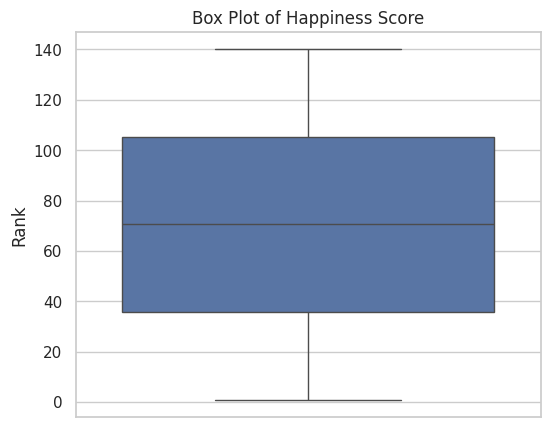

In [19]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df[score_col])
plt.title("Box Plot of Happiness Score")
plt.show()


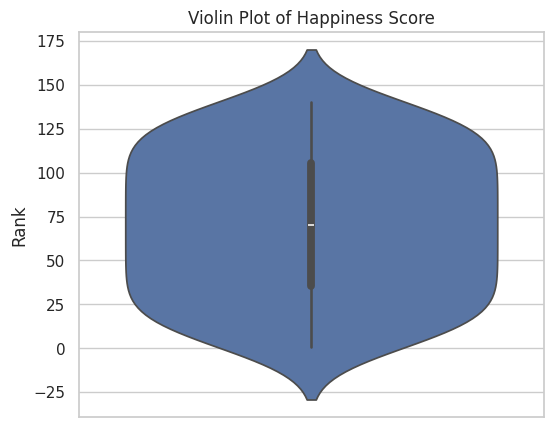

In [20]:
plt.figure(figsize=(6,5))
sns.violinplot(y=df[score_col])
plt.title("Violin Plot of Happiness Score")
plt.show()


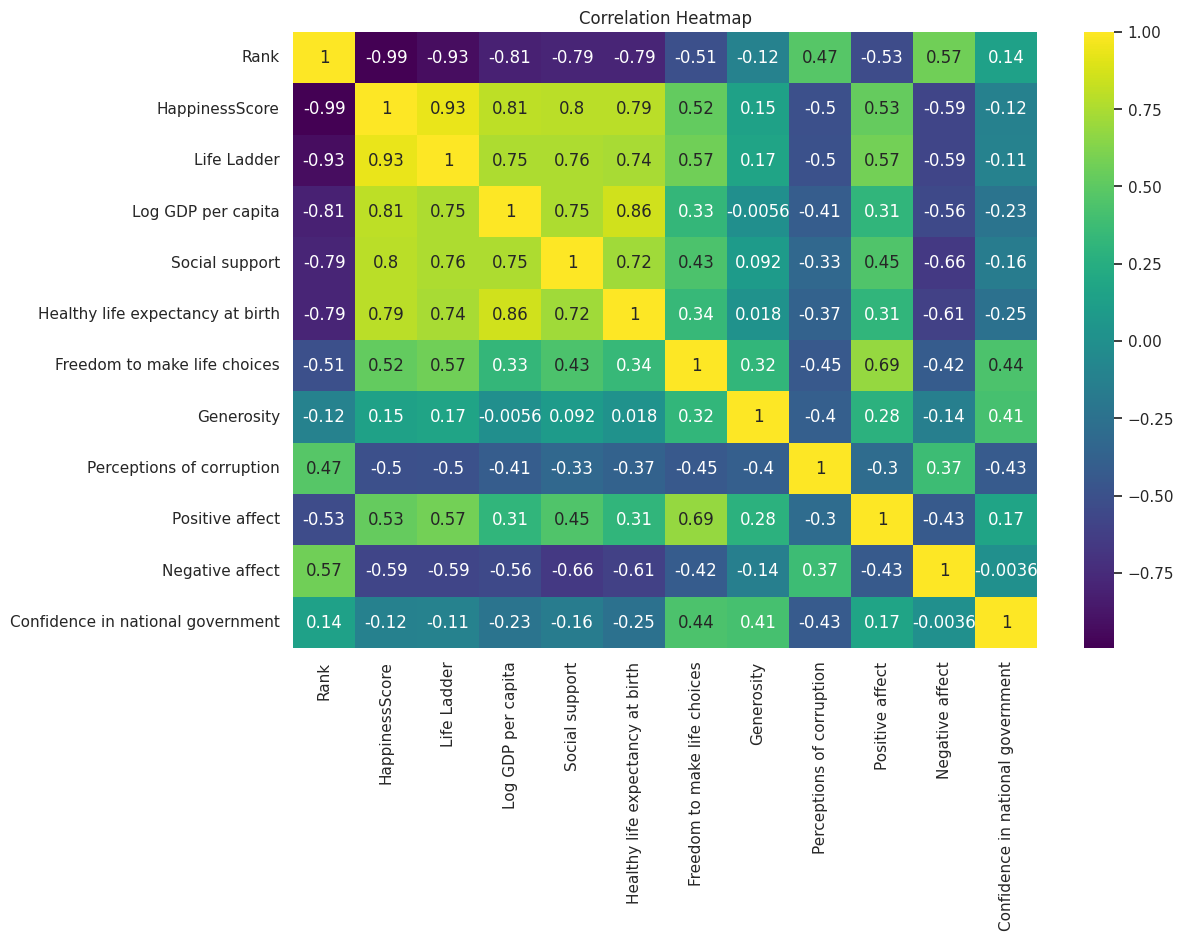

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


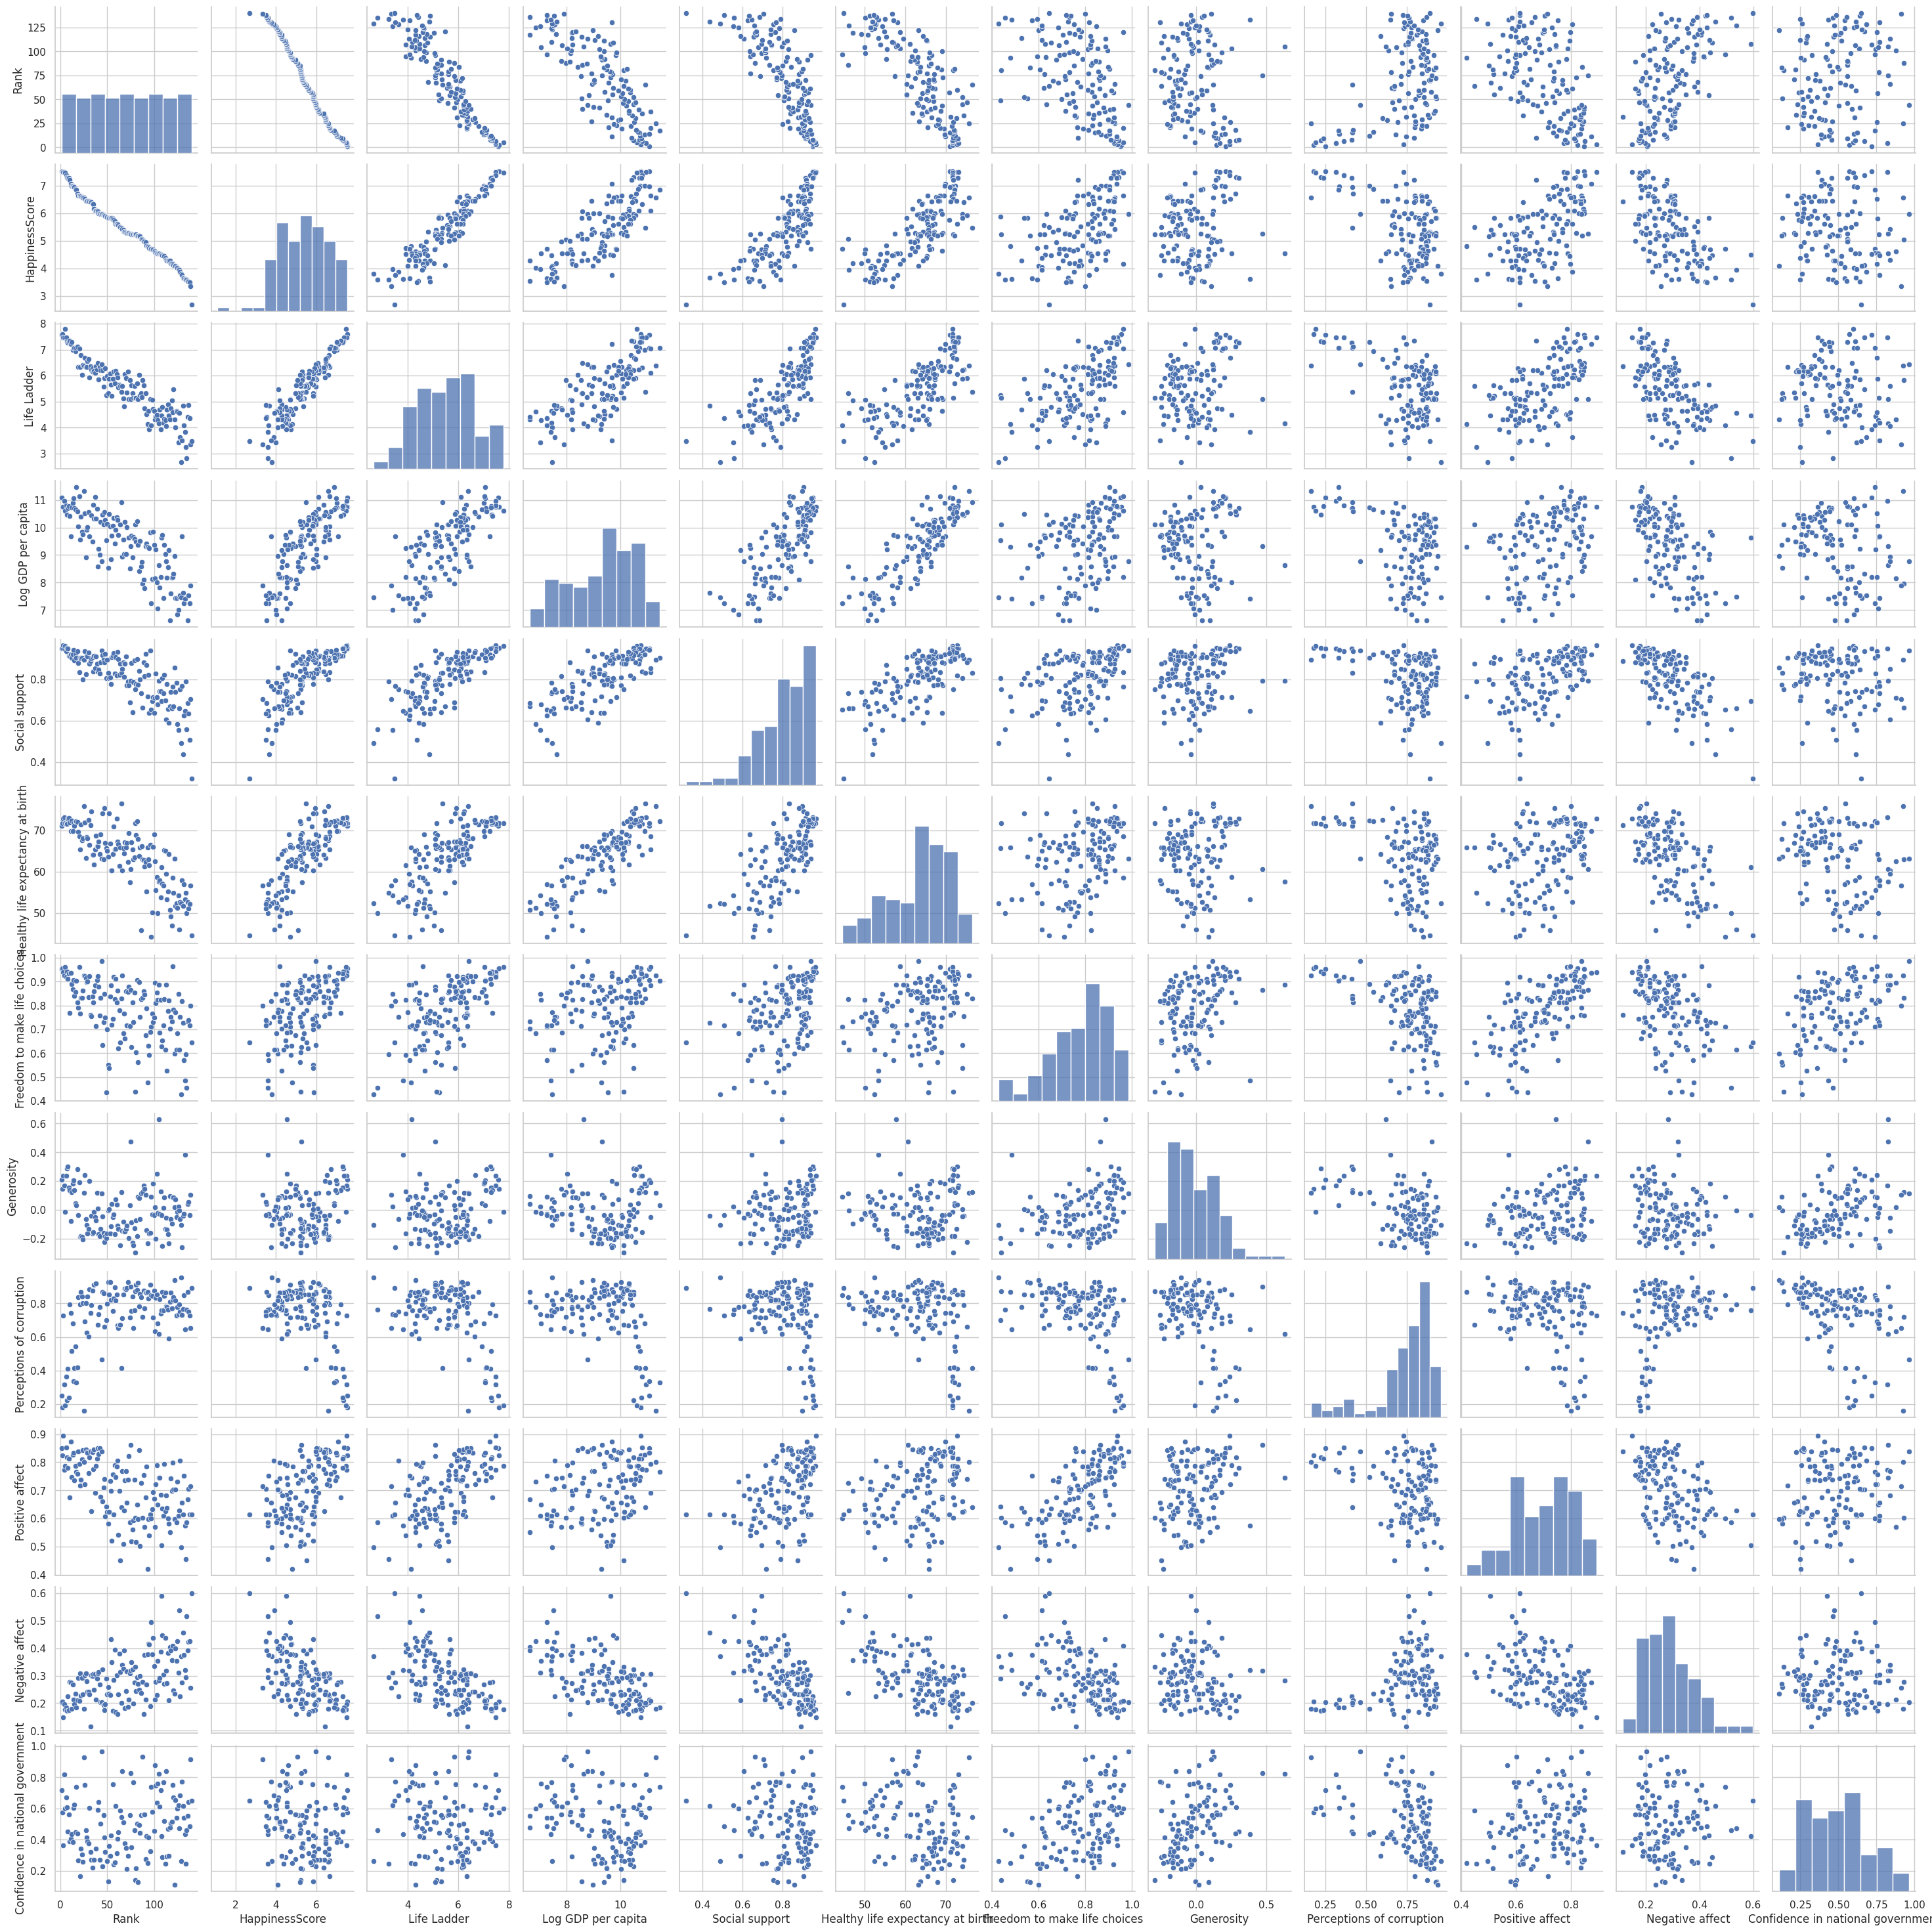

In [22]:
sns.pairplot(df_numeric)
plt.show()


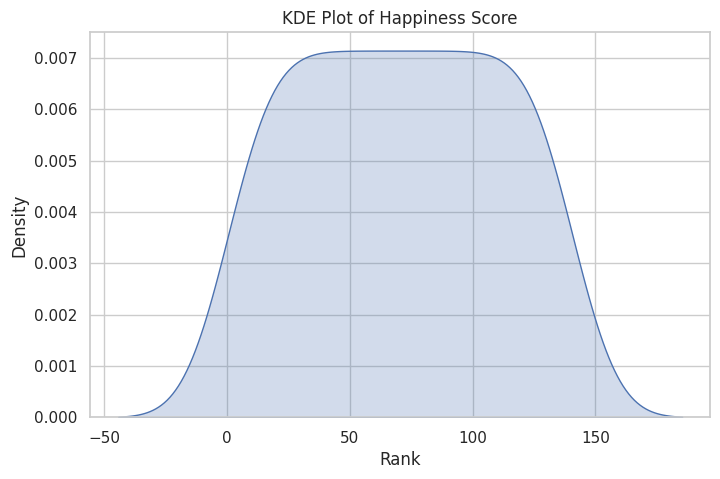

In [23]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[score_col], fill=True)
plt.title("KDE Plot of Happiness Score")
plt.show()
